# Analysis 2
- Considering the cases where the H1B petitions are for Full time positions and have been certified by the DoL
- Plotting the concentration of the applications using a Scatter plot
- Randomly sampling 1000 applications and plotting them on the map of USA using folium package


In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import plotly.plotly as py
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

/Users/kvs25/anaconda3/lib/python3.5/site-packages/numexpr/cpuinfo.py:53: UserWarning: [Errno 2] No such file or directory: 'machine'
  stacklevel=stacklevel + 1)
/Users/kvs25/anaconda3/lib/python3.5/site-packages/numexpr/cpuinfo.py:53: UserWarning: [Errno 2] No such file or directory: 'arch'
  stacklevel=stacklevel + 1)
/Users/kvs25/anaconda3/lib/python3.5/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory: 'sysctl'
  stacklevel=stacklevel + 1):


In [2]:
df = pd.read_csv('data/H1B_petition_dataset.csv', encoding = "ISO-8859-1",index_col=False)

In [3]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,lon,lat
0,DENIED,CARNEGIE MELLON UNIVERSITY,COMPUTER AND INFORMATION RESEARCH SCIENTISTS,RESEARCH ASSOCIATE,Y,6044480.0,2016,PITTSBURGH,PENNSYLVANIA,-79.995886,40.440625
1,DENIED,TIGHTEN CO,WEB DEVELOPERS,WEB DEVELOPER,Y,4316000.0,2016,DALLAS,TEXAS,-96.796988,32.776664
2,WITHDRAWN,GLOBAL INFOTECH CORPORATION,COMPUTER PROGRAMMERS,COMPUTER PROGRAMMER,Y,4193280.0,2016,SAN FRANCISCO,CALIFORNIA,-122.419415,37.774929
3,DENIED,SYNTEL INC,COMPUTER SYSTEMS ANALYSTS,PROGRAMMER ANALYST,Y,4087356.0,2016,QUINCY,MASSACHUSETTS,-71.002270,42.252877
4,WITHDRAWN,IBM INDIA PRIVATE LIMITED,COMPUTER PROGRAMMERS,LEAD DATA SPECIALIST,Y,3277248.0,2016,TAMPA,FLORIDA,-82.457178,27.950575


In [7]:
certi= df[df.CASE_STATUS=='CERTIFIED'][df.FULL_TIME_POSITION=='Y']

/Users/kvs25/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [8]:
certi=certi.reset_index(drop=True)
certi.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,lon,lat
0,CERTIFIED,"SAATCHI & SAATCHI NORTH AMERICA, INC.",CHIEF EXECUTIVES,CHIEF CREATIVE OFFICER,Y,631700.0,2016,TORRANCE,CALIFORNIA,-118.340629,33.835849
1,CERTIFIED,MERCY PROFESSIONAL CARE CORPORATION,"PHYSICIANS AND SURGEONS, ALL OTHER",CARDIOLOGIST PHYSICIAN,Y,488400.0,2016,CANTON,OHIO,-81.378447,40.798947
2,CERTIFIED,"NORTHERN NEVADA MEDICAL GROUP, LLC","PHYSICIANS AND SURGEONS, ALL OTHER",INTERVENTIONAL CARDIOLOGIST,Y,413484.0,2016,SPARKS,NEVADA,-119.752689,39.534911
3,CERTIFIED,EVANGELICAL MEDICAL SERVICES ORGANIZATION,ANESTHESIOLOGISTS,ANESTHESIOLOGIST,Y,395480.0,2016,LEWISBURG,PENNSYLVANIA,-76.884410,40.964529
4,CERTIFIED,VIRTUAL EDUCA FOUNDATION,"COMMUNITY AND SOCIAL SERVICE SPECIALISTS, ALL",EXECUTIVE DIRECTOR,Y,387132.0,2016,SAN JUAN,PUERTORICO,-66.105735,18.465539


In [11]:
certi=certi.dropna()

In [12]:
certi.shape

(257133, 11)

In [22]:
#randomly sampled 1000 applications to check the concentration of the H1B applications
graph_data=certi.sample(1000)

In [6]:
import folium

In [7]:
#folium.CircleMarker(location=[45.5, -122.3], radius=1000, popup='Portland, OR')

In [18]:
output = folium.Map(location=[37.0902, -95.7129],zoom_start=4)

In [19]:
marker_cluster = folium.MarkerCluster().add_to(output)

In [20]:
output

In [25]:
output.save('ana_2/output.html')

In [23]:
for index,row in graph_data.iterrows():
    #print (row['lon'])
    if not pd.isnull(row['lon']):
        folium.Marker(location = [row['lat'],row['lon']],icon = folium.Icon(color ='green')).add_to(output)
    #folium.CircleMarker(location=[row['lat'], row['lon']], radius=30, color='green', fill_color='green').add_to(output)

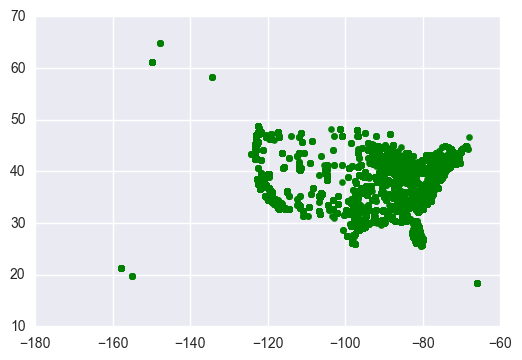

In [32]:
plt.scatter(certi.lon,certi.lat,color='g')